Article used for recreating charts using Altair: [The Mayweather-McGregor Fight, As Told Through Emojis](https://fivethirtyeight.com/features/the-mayweather-mcgregor-fight-as-told-through-emojis/). This article is based on the dataset:

Created by FiveThirtyEight with the Twitter Streaming API containing a sample of all the tweets that matched the search terms: #MayMac, #MayweatherMcGregor, #MayweatherVMcGregor, #MayweatherVsMcGregor, #McGregor and #Mayweather collected between 12:05 a.m. and 1:15 a.m. EDT, 12,118 that had emojis. Available [on github](https://github.com/fivethirtyeight/data/tree/master/mayweather-mcgregor)

In [1]:
# start with the setup
import pandas as pd
import altair as alt
import numpy as np

In [2]:
# enable correct rendering
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [3]:
# uses intermediate json files to speed things up
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [4]:
# I'm going to do some setup here in anticipation of needing the data in 
# a specific format. We moved it all up here so everything is in one place.

# load the tweets
tweets = pd.read_csv('assets/tweets.csv')

# I'm going to process the data in a couple of ways
# first, I want to know how many emojis are in each tweet so I'll create a new column
# that counts them
tweets['emojis'] = tweets['text'].str.findall(r'[^\w\s.,"@\'?/#!$%\^&\*;:{}=\-_`~()\U0001F1E6-\U0001F1FF]').str.len()

# next, there are a few specific emojis that I care about, we're going to create
# a column for each one and indicate how many times it showed up in the tweet
boxer_emojis = ['☘️','🇮🇪','🍀','💸','🤑','💰','💵','😴','😂','🤣','🥊','👊','👏','🇮🇪','💪','🔥','😭','💰']
for emoji in boxer_emojis:
    # here's a different way to get the counts
    tweets[emoji] = tweets.text.str.count(emoji)
    
# For the irish pride vs the money team I want the numer 
# of either ☘️, 🇮🇪 or 🍀 and 💸, 🤑, 💰 or 💵 for each
tweets['irish_pride'] = tweets['☘️'] + tweets['🇮🇪'] + tweets['🍀']
tweets['money_team'] = tweets['💸'] + tweets['🤑'] + tweets['💰'] +  tweets['💵']

In [5]:
tweets.head()

,created_at,emojis,id,link,retweeted,screen_name,text,☘️,🇮🇪,🍀,...,😂,🤣,🥊,👊,👏,💪,🔥,😭,irish_pride,money_team
0,2017-08-27 00:05:34,1,901656910939770881,https://twitter.com/statuses/901656910939770881,False,aaLiysr,Ringe çıkmadan ateş etmeye başladı 😃#McGregor ...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-08-27 00:05:35,5,901656917281574912,https://twitter.com/statuses/901656917281574912,False,zulmafrancozaf,😲😲😲😲😲 @lalylourbet2 https://t.co/ERUGHhQINE,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-08-27 00:05:35,2,901656917105369088,https://twitter.com/statuses/901656917105369088,False,Adriana11D,🇮🇪🇮🇪🇮🇪 💪💪#MayweathervMcgregor,0,3,0,...,0,0,0,0,0,2,0,0,3,0
3,2017-08-27 00:05:35,2,901656917747142657,https://twitter.com/statuses/901656917747142657,False,Nathan_Caro_,Cest partit #MayweatherMcGregor 💪🏿,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2017-08-27 00:05:35,2,901656916828594177,https://twitter.com/statuses/901656916828594177,False,sahouraxox,Low key feeling bad for ppl who payed to watch...,0,0,0,...,0,2,0,0,0,0,0,0,0,0


# The Mayweather-McGregor Fight, As Told Through Emojis

 ### <font color=grey>We laughed, cried and cried some more. </font>

_Original article available at [FiveThirtyEight](https://fivethirtyeight.com/features/the-mayweather-mcgregor-fight-as-told-through-emojis/)_

By [Dhrumil Mehta](https://fivethirtyeight.com/contributors/dhrumil-mehta/), [Oliver Roeder](https://fivethirtyeight.com/contributors/oliver-roeder/) and [Rachael Dottle](https://fivethirtyeight.com/contributors/rachael-dottle/)

Filed under [Mayweather vs. McGregor](https://fivethirtyeight.com/tag/mayweather-vs-mcgregor/)

Get the data on [GitHub](https://github.com/fivethirtyeight/data/tree/master/mayweather-mcgregor)

For the nearly 15,000 people in Las Vegas’s T-Mobile Arena on Saturday night, and the millions more huddled around TVs across the world, the Floyd Mayweather–Conor McGregor fight was a roller coaster of emotions. They were anxious as pay-per-view [technical problems](http://www.espn.com/boxing/story/_/id/20469815/floyd-mayweather-conor-mcgregor-delay-ppv-problems) pushed back the fight’s start. They were full of anticipation when the combatants finally emerged after months of hype. They were surprised when McGregor held his own, or seemed to hold his own, for a couple of rounds. They were thrilled when Mayweather finally started fighting. And they were exhausted by the end.

How do we know all this? Emojis.

We were monitoring Twitter on fight night, pulling tweets that contained fight-related hashtags — those that included #MayweatherVsMcgregor, for example. In the end, we collected about 200,000 fight-related tweets, of which more than 12,000 contained emojis. (To be clear, that’s a small enough sample that this emojinalysis might not make it through peer review.)<sup>1<sup>

> <font color=grey> 1. I used the [Twitter Streaming API](https://dev.twitter.com/streaming/overview) which provides a sample of all the tweets that matched our search terms: #MayMac, #MayweatherMcGregor, #MayweatherVMcGregor, #MayweatherVsMcGregor, #McGregor and #Mayweather. Of the 197,989 tweets we collected between 12:05 a.m. and 1:15 a.m. EDT, 12,118 had emojis.</font>

In [6]:
# Creating a table that has the percentages for each emoji

# dictionary that will map emoji to percentage
percentages = {}  

# find total emojies
total = tweets['emojis'].sum() 

# for each emoji, figure out how prevalent it is
emojis = ['😂','🤣','🥊','👊','👏','🇮🇪','💪','🔥','😭','💰']
for emoji in emojis:  
    percentages[emoji] = [round(tweets[emoji].sum() / total * 100,1)]
    
# create a data frame to hold this from the dictionary
percentages_df = pd.DataFrame.from_dict(percentages).T

# sort the dictionary 
percentages_df = percentages_df.sort_values(by=[0], ascending = False).reset_index()

# rename the columns
percentages_df = percentages_df.rename(columns={'index':'EMOJI', 0: 'PERCENT'})

# create a rank column based on position in the ordered list
percentages_df['rank'] = pd.Index(list(range(1,11)))

# modify the text
percentages_df['PERCENT_TEXT'] = percentages_df['PERCENT'].astype('str') + ' %'

In [7]:
percentages_df

,EMOJI,PERCENT,rank,PERCENT_TEXT
0,😂,23.1,1,23.1 %
1,🥊,5.7,2,5.7 %
2,👊,3.5,3,3.5 %
3,👏,3.0,4,3.0 %
4,💪,2.5,5,2.5 %
5,🇮🇪,2.4,6,2.4 %
6,🤣,2.3,7,2.3 %
7,🔥,2.3,8,2.3 %
8,😭,2.0,9,2.0 %
9,💰,1.8,10,1.8 %


In [8]:
chart = alt.Chart(percentages_df).mark_bar(size=17, color= 'gold', dx=100).encode(
    x=alt.X(
        'PERCENT',axis=None),
    y=alt.Y(
        'PERCENT_TEXT',
         axis=alt.Axis(domain=False, tickSize=0,title='',labelPadding=30) ,sort='-y'))

text = alt.Chart(percentages_df).mark_text().encode(
    y=alt.Y('PERCENT_TEXT',axis=None, sort='-y'),
    text='EMOJI')

alt.themes.enable('fivethirtyeight')
emoji_chart = alt.hconcat(text,chart).configure_view(strokeWidth=0).configure_axis(grid=False)
emoji_chart

alt.HConcatChart(...)

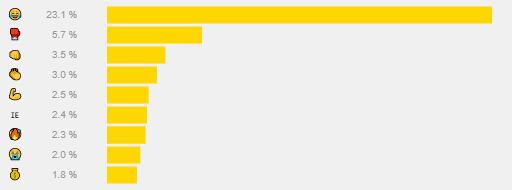

There were the likely frontrunners for most-used emoji: the 🥊, the 👊, the 💪. But the emoji of the fight was far and away the 😂. (“Face with tears of joy.”)<sup>2<sup>

> <font color=grey> 1.2. That’s certainly appropriate for this spectacle, but it should be noted that 😂 is also the [most tweeted](http://emojitracker.com/) emoji generally.</font>

For one thing, the fight was a sharply partisan affair. The majority of people in the arena appeared to be McGregor fans — he hails from Dublin and an Irish flag, worn cape-style, almost seemed like the evening’s dress code. But other fans were members of TMT — The Money Team — and loyal to “Money” Mayweather. Twitter’s loyalties came and went as the match progressed, with enthusiasm from either camp seemingly matching each fighter’s success.

In [11]:
# I am going to want to work with time objects so we need to make a datetime
# column (basically transforming the text in "created at"). It duplicates
# the data but it will make things easier


tweets['datetime'] = pd.to_datetime(tweets['created_at'])
tweets = tweets.set_index('datetime')


teams = tweets.copy()
teams['irish_pride']
teams = teams.resample('1s').sum()
teams  = teams[(teams['💸']>0) | (teams['🤑']>0) | (teams['💰']>0) | (teams['💵']>0) | (teams['☘️']>0) | (teams['🍀']>0) | (teams['🇮🇪']>0) ]

# next I'm going to creat a rolling average
# first for the money team
mdf = teams['money_team'].rolling('4Min').mean().reset_index()
mdf['team'] = '💸🤑💰💵'
mdf = mdf.rename(columns={'money_team':'tweet_count'})

# next for the irish team
idf = teams['irish_pride'].rolling('4Min').mean().reset_index()
idf['team'] = '☘️🍀🇮🇪'
idf = idf.rename(columns={'irish_pride':'tweet_count'})

# now I'll combine our datasets
ndf = pd.concat([mdf,idf])

In [12]:
ndf.sample(5)

,datetime,tweet_count,team
391,2017-08-27 00:37:29,0.866667,☘️🍀🇮🇪
270,2017-08-27 00:21:58,0.816327,💸🤑💰💵
18,2017-08-27 00:06:09,2.000000,☘️🍀🇮🇪
572,2017-08-27 00:56:45,2.102941,💸🤑💰💵
487,2017-08-27 00:51:36,1.107143,💸🤑💰💵


In [13]:
# I'm also going to create an annotations data frame
annotations = [['2017-08-27 00:15:00',4, 'Fight begins'],
               ['2017-08-27 00:22:00',5, 'McGregor does OK \nin the early rounds'],
               ['2017-08-27 00:53:00',4, 'Mayweather takes \nover and wins by \nTKO']]
a_df = pd.DataFrame(annotations, columns=['date','count','note'])

In [14]:
a_df

,date,count,note
0,2017-08-27 00:15:00,4,Fight begins
1,2017-08-27 00:22:00,5,McGregor does OK \nin the early rounds
2,2017-08-27 00:53:00,4,Mayweather takes \nover and wins by \nTKO


In [20]:
tweet = alt.Chart(ndf).mark_line(thickness=5).encode(
    x=alt.X('datetime:T',axis=alt.Axis(tickCount=8,title='')),
    y=alt.Y('tweet_count:Q',axis=alt.Axis(tickCount=4,title='Four-minute rolling average')),
    color=alt.Color('team:N',legend = alt.Legend(orient='top',symbolType="stroke",title=None,symbolSize=40), 
                    scale=alt.Scale(domain=['☘️🍀🇮🇪','💸🤑💰💵'],range=['green','gold']))
).properties(
    title={
        'text':['Much Hype, some boredom'],
        'subtitle':["Four-minute rolling average of the number of uses of selected emoji in","sampled tweets during the Mayweather-McGregor fight"]
    }

)

a_df['date'] = pd.to_datetime(a_df['date'])
text = alt.Chart(a_df).mark_text(
    color='black',lineBreak='\n',
).encode(
    x='date',
    y='count:Q',
    text = 'note:N')

fight_start1 = [['2017-08-27 00:15:00', 2.1],['2017-08-27 00:15:00', 3.5]]
fight_start1_df=pd.DataFrame(fight_start1, columns=['date','count'])
fight_start1_df['date'] = pd.to_datetime(fight_start1_df['date'])
start1 = alt.Chart(fight_start1_df).mark_line(color = 'black').encode(
    x='date',
    y='count:Q',
)

fight_start2 = [['2017-08-27 00:30:00', 3.8],['2017-08-27 00:24:00', 4.5]]
fight_start2_df=pd.DataFrame(fight_start2, columns=['date','count'])
fight_start2_df['date'] = pd.to_datetime(fight_start2_df['date'])
start2 = alt.Chart(fight_start2_df).mark_line(color = 'black').encode(
    x='date',
    y='count:Q',
)

fight_start3 = [['2017-08-27 00:53:00', 3.2],['2017-08-27 00:53:00', 3.2]]
fight_start3_df=pd.DataFrame(fight_start3, columns=['date','count'])
fight_start3_df['date'] = pd.to_datetime(fight_start3_df['date'])
start3 = alt.Chart(fight_start3_df).mark_line(color = 'black').encode(
    x='date',
    y='count:Q',
)
alt.themes.enable('fivethirtyeight')
fight_chart_all=alt.layer(tweet,text,start1,start2,start3)
fight_chart_all


alt.LayerChart(...)

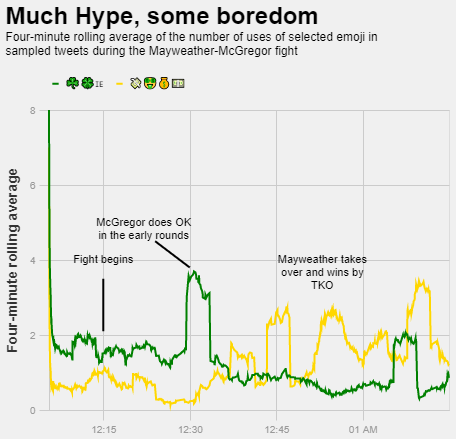

To the surprise of many (of the neutral and pro-Mayweather viewers, anyway) McGregor won the first round. The next couple were washes, and a quarter of the way into the [scheduled 12 rounds](https://www.nytimes.com/2017/08/26/sports/mayweather-mcgregor.html) … the Irish underdog may have been winning! The Irish flags and shamrocks followed on Twitter. Things slowly (perhaps even 😴ly) turned around as one of the best pound-for-pound boxers in history took control of the man making his pro debut — an outcome which was predicted by precisely everyone. Out came the emoji money bags.

By the sixth round, it seemed like only a matter of time until the old pro dismantled the newcomer. By the ninth it was clear Mayweather was going for the knockout. It came soon thereafter. Mayweather unleashed a vicious flurry of punches in the 10th and the ref stepped in, declaring Mayweather the victor and saving McGregor, who was somehow still on his feet, from further damage.

In [16]:
annotations1 = [['2017-08-27 00:15:00',1.4, 'Fight begins'],
               ['2017-08-27 00:30:00',3, ''],
               ['2017-08-27 00:50:00',2.9, 'Mayweather takes control in middle rounds']]
a_df1 = pd.DataFrame(annotations1, columns=['date1','count1','note1'])

tweets = pd.read_csv('assets/tweets.csv')

tweets['emojis'] = tweets['text'].str.findall(r'[^\w\s.,"@\'?/#!$%\^&\*;:{}=\-_`~()\U0001F1E6-\U0001F1FF]').str.len()

hype_emojis = ['🔥','😴']
for emoji1 in hype_emojis:
    # here's a different way to get the counts
    tweets[emoji1] = tweets.text.str.count(emoji1)
    
tweets['fire'] = tweets['🔥'] 
tweets['sleep'] = tweets['😴']

tweets['datetime'] = pd.to_datetime(tweets['created_at'])
tweets = tweets.set_index('datetime')


teams1 = tweets.copy()
teams1['fire']
teams1 = teams1.resample('1s').sum()
teams1  = teams1[(teams1['🔥']>0) | (teams1['😴']>0)  ]

mdf1 = teams1['sleep'].rolling('4Min').mean().reset_index()
mdf1['team'] = '😴'
mdf1 = mdf1.rename(columns={'sleep':'tweet_count'})

idf1 = teams1['fire'].rolling('4Min').mean().reset_index()
idf1['team'] = '🔥'
idf1 = idf1.rename(columns={'fire':'tweet_count'})

ndf1 = pd.concat([mdf1,idf1])

hype = alt.Chart(ndf1).mark_line(thickness=5).encode(
    x=alt.X('datetime:T',axis=alt.Axis(tickCount=8,title='')),
    y=alt.Y('tweet_count:Q',axis=alt.Axis(tickCount=4,title='Four-minute rolling average')),
    color=alt.Color('team:N',legend = alt.Legend(orient='top',symbolType="stroke",title=None,symbolSize=40), 
                    scale=alt.Scale(domain=['🔥','😴'],range=['red','cyan']))
).properties(
    width=500,
    height=380,
    title={
        'text':['Much Hype, some boredom'],
        'subtitle':["Four-minute rolling average of the number of uses of selected emoji in","sampled tweets during the Mayweather-McGregor fight"]
    }
)

a_df1['date1'] = pd.to_datetime(a_df1['date1'])
text1 = alt.Chart(a_df1).mark_text(
    color='black',lineBreak='\n',
).encode(
    x='date1',
    y='count1:Q',
    text = 'note1:N')

hype_start1 = [['2017-08-27 00:15:00', 1.30],['2017-08-27 00:15:00', 0.75]]
hype_start1_df=pd.DataFrame(hype_start1, columns=['date1','count1'])
hype_start1_df['date1'] = pd.to_datetime(hype_start1_df['date1'])
hype1 = alt.Chart(hype_start1_df).mark_line(color = 'black').encode(
    x='date1',
    y='count1:Q',
)

hype_start2 = [['2017-08-27 00:34:00', 2.8],['2017-08-27 00:31:00', 1.9]]
hype_start2_df=pd.DataFrame(hype_start2, columns=['date1','count1'])
hype_start2_df['date1'] = pd.to_datetime(hype_start2_df['date1'])
hype2 = alt.Chart(hype_start2_df).mark_line(color = 'black').encode(
    x='date1',
    y='count1:Q',
)

hype_start3 = [['2017-08-27 00:45:00', 2.75],['2017-08-27 00:45:00', 1.5]]
hype_start3_df=pd.DataFrame(hype_start3, columns=['date1','count1'])
hype_start3_df['date1'] = pd.to_datetime(hype_start3_df['date1'])
hype3 = alt.Chart(hype_start3_df).mark_line(color = 'black').encode(
    x='date1',
    y='count1:Q',
)
alt.themes.enable('fivethirtyeight')
hype_chart_all=alt.layer(hype,text1,hype1,hype2,hype3)
hype_chart_all


alt.LayerChart(...)

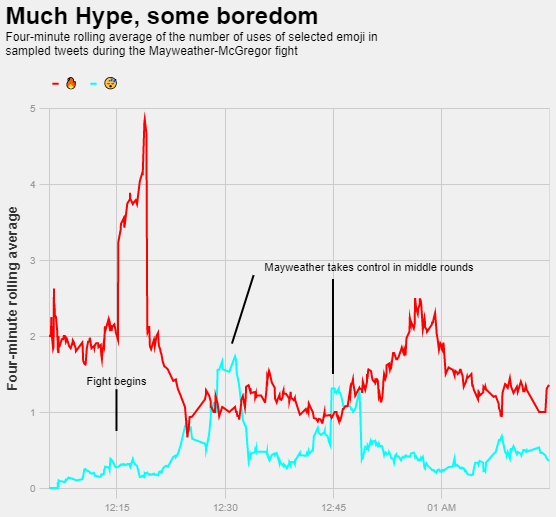

It ended just over 37 minutes after it began. Five seconds later, Mayweather leapt up on the corner ropes, victorious — [50-0](https://fivethirtyeight.com/features/mayweather-is-defined-by-the-zero-next-to-his-name/). Some observers declared it a [satisfying spectacle](https://www.si.com/boxing/2017/08/27/after-months-hype-mayweather-and-mcgregor-deliver-boxing-spectacle). Others, McGregor chief among them, [were frustrated with the finish](https://www.cbssports.com/boxing/news/conor-mcgregor-frustrated-with-refs-fight-stoppage-let-the-man-put-me-down/). The emoji users on Twitter appeared to think the fight was, for the most part, 🔥 — especially as it heated up toward the end. While the result may never have been in question, this was a welcome outcome for many who viewed Mayweather’s last megafight against Manny Pacquiao as an epic 😴😴😴😴.

In [17]:
annotations2 = [['2017-08-27 00:15:00',2.25, 'Fight begins'],
               ['2017-08-27 00:34:00',2, 'McGregor\n impresses\n early'],
               ['2017-08-27 00:55:00',0.25, 'Fight ends']]
a_df2 = pd.DataFrame(annotations2, columns=['date2','count2','note2'])

tweets = pd.read_csv('assets/tweets.csv')

tweets['emojis'] = tweets['text'].str.findall(r'[^\w\s.,"@\'?/#!$%\^&\*;:{}=\-_`~()\U0001F1E6-\U0001F1FF]').str.len()

laugh_emojis = ['😭','🤣']
for emoji2 in laugh_emojis:
    # here's a different way to get the counts
    tweets[emoji2] = tweets.text.str.count(emoji2)
    
tweets['cry'] = tweets['😭'] 
tweets['laugh'] = tweets['🤣']

tweets['datetime'] = pd.to_datetime(tweets['created_at'])
tweets = tweets.set_index('datetime')


teams2 = tweets.copy()
teams2['cry']
teams2 = teams2.resample('1s').sum()
teams2  = teams2[(teams2['😭']>0) | (teams2['🤣']>0)  ]

mdf2 = teams2['laugh'].rolling('4Min').mean().reset_index()
mdf2['team'] = '🤣'
mdf2 = mdf2.rename(columns={'laugh':'tweet_count'})

idf2 = teams2['cry'].rolling('4Min').mean().reset_index()
idf2['team'] = '😭'
idf2 = idf2.rename(columns={'cry':'tweet_count'})

ndf2 = pd.concat([mdf2,idf2])

laugh_cry = alt.Chart(ndf2).mark_line(thickness=5).encode(
    x=alt.X('datetime:T',axis=alt.Axis(tickCount=8,title='')),
    y=alt.Y('tweet_count:Q',axis=alt.Axis(values=[0,0.5,1.0,1.5,2.0,2.5],title='Four-minute rolling average')),
    color=alt.Color('team:N',legend = alt.Legend(orient='top',symbolType="stroke",title=None,symbolSize=40), 
                    scale=alt.Scale(domain=['😭','🤣'],range=['cyan','orange']))
).properties(
    width=500,
    height=380,
    title={
        'text':['Tears were shed-of joy and sorrow'],
        'subtitle':["Four-minute rolling average of the number of uses of selected emoji in","sampled tweets during the Mayweather-McGregor fight"]
    }
)

a_df2['date2'] = pd.to_datetime(a_df2['date2'])
text1 = alt.Chart(a_df2).mark_text(
    color='black',lineBreak='\n',
).encode(
    x='date2',
    y='count2:Q',
    text = 'note2:N')

laugh_cry_start1 = [['2017-08-27 00:15:00', 2.10],['2017-08-27 00:15:00', 1.45]]
laugh_cry_start1_df=pd.DataFrame(laugh_cry_start1, columns=['date2','count2'])
laugh_cry_start1_df['date2'] = pd.to_datetime(laugh_cry_start1_df['date2'])
laugh_cry1 = alt.Chart(laugh_cry_start1_df).mark_line(color = 'black').encode(
    x='date2',
    y='count2:Q',
)

laugh_cry_start2 = [['2017-08-27 00:30:00', 1.8],['2017-08-27 00:25:00', 1.6]]
laugh_cry_start2_df=pd.DataFrame(laugh_cry_start2, columns=['date2','count2'])
laugh_cry_start2_df['date2'] = pd.to_datetime(laugh_cry_start2_df['date2'])
laugh_cry2 = alt.Chart(laugh_cry_start2_df).mark_line(color = 'black').encode(
    x='date2',
    y='count2:Q',
)

laugh_cry_start3 = [['2017-08-27 00:55:00', 0.75],['2017-08-27 00:55:00', 0.4]]
laugh_cry_start3_df=pd.DataFrame(laugh_cry_start3, columns=['date2','count2'])
laugh_cry_start3_df['date2'] = pd.to_datetime(laugh_cry_start3_df['date2'])
laugh_cry3 = alt.Chart(laugh_cry_start3_df).mark_line(color = 'black').encode(
    x='date2',
    y='count2:Q',
)
alt.themes.enable('fivethirtyeight')
laugh_cry_chart_all=alt.layer(laugh_cry,text1,laugh_cry1,laugh_cry2,laugh_cry3)
laugh_cry_chart_all


alt.LayerChart(...)

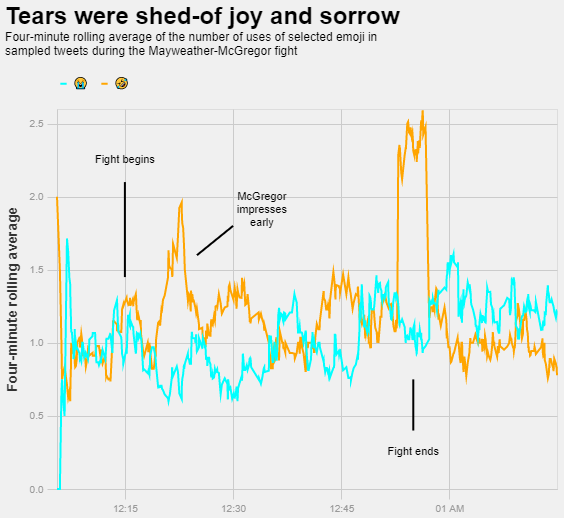

They laughed. They cried. And they laughed some more. And they cried some more.

In [18]:
scatter = alt.Chart(ndf2).mark_area(thickness=5).encode(
    x=alt.X('datetime:T',axis=alt.Axis(tickCount=8,title='')),
    y=alt.Y('tweet_count:Q',axis=alt.Axis(values=[0,0.5,1.0,1.5,2.0,2.5],title='Four-minute rolling average')),
    color=alt.Color('team:N',legend = alt.Legend(orient='top',symbolType="circle",title=None,symbolSize=40), 
                    scale=alt.Scale(domain=['😭','🤣'],range=['grey','pink'])))
    
    
a_df2['date2'] = pd.to_datetime(a_df2['date2'])
text1 = alt.Chart(a_df2).mark_text(
    color='black',lineBreak='\n',
).encode(
    x='date2',
    y='count2:Q',
    text = 'note2:N')


scatter_start1 = [['2017-08-27 00:15:00', 2.10],['2017-08-27 00:15:00', 1.45]]
scatter_start1_df=pd.DataFrame(scatter_start1, columns=['date2','count2'])
scatter_start1_df['date2'] = pd.to_datetime(scatter_start1_df['date2'])
scatter1 = alt.Chart(scatter_start1_df).mark_line(color = 'black').encode(
    x='date2',
    y='count2:Q',
)

scatter_start2 = [['2017-08-27 00:30:00', 1.8],['2017-08-27 00:25:00', 1.6]]
scatter_start2_df=pd.DataFrame(scatter_start2, columns=['date2','count2'])
scatter_start2_df['date2'] = pd.to_datetime(scatter_start2_df['date2'])
scatter2 = alt.Chart(scatter_start2_df).mark_line(color = 'black').encode(
    x='date2',
    y='count2:Q',
)

scatter_start3 = [['2017-08-27 00:55:00', 0.75],['2017-08-27 00:55:00', 0.4]]
scatter_start3_df=pd.DataFrame(scatter_start3, columns=['date2','count2'])
scatter_start3_df['date2'] = pd.to_datetime(scatter_start3_df['date2'])
scatter3 = alt.Chart(scatter_start3_df).mark_line(color = 'black').encode(
    x='date2',
    y='count2:Q',
)
alt.themes.enable('fivethirtyeight')
scatter_all=alt.layer(scatter,text1,scatter1, scatter2, scatter3)
scatter_all


scatter_all

alt.LayerChart(...)

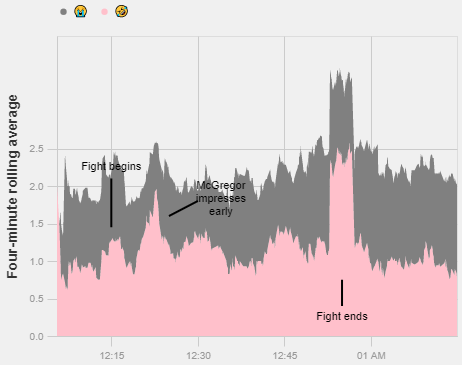

I chose an area plot to visualize the data for the '😭' and '🤣' data as a more effective visual than the line plot. The area plot displays time as a step chart with its area filled in and its line emphasized. The line plot welcomes the perception of time but does not represent secular events as easily to the eye due to the amount of white space in the line plot. This version of the data has less white space with the area colored in and draws attention to the event that occured at 12:55 with both emojis used at a high frequency. 

In [19]:
annotations_new1 = [['2017-08-27 00:15:00',1.2, 'Fight begins'],
               ['2017-08-27 00:55:00',0.25, 'Fight ends']]
a_df_new1 = pd.DataFrame(annotations_new1, columns=['date_new1','count_new1','note_new1'])

tweets = pd.read_csv('assets/tweets.csv')

tweets['emojis'] = tweets['text'].str.findall(r'[^\w\s.,"@\'?/#!$%\^&\*;:{}=\-_`~()\U0001F1E6-\U0001F1FF]').str.len()

event_emojis = ['🤣','🥊']
for emoji_new1 in event_emojis:
    # here's a different way to get the counts
    tweets[emoji_new1] = tweets.text.str.count(emoji_new1)
    
tweets['fire'] = tweets['🤣'] 
tweets['punch'] = tweets['🥊']

tweets['datetime'] = pd.to_datetime(tweets['created_at'])
tweets = tweets.set_index('datetime')


teams_new1 = tweets.copy()
teams_new1['fire']
teams_new1 = teams_new1.resample('1s').sum()
teams_new1  = teams_new1[(teams_new1['🤣']>0) | (teams_new1['🥊']>0)  ]

mdf_new1 = teams_new1['punch'].rolling('4Min').mean().reset_index()
mdf_new1['team'] = '🥊'
mdf_new1 = mdf_new1.rename(columns={'punch':'tweet_count'})

idf_new1 = teams_new1['fire'].rolling('4Min').mean().reset_index()
idf_new1['team'] = '🤣'
idf_new1 = idf_new1.rename(columns={'fire':'tweet_count'})

ndf_new1 = pd.concat([mdf_new1,idf_new1])

event = alt.Chart(ndf_new1).mark_point().encode(
    x=alt.X('datetime:T',axis=alt.Axis(tickCount=4,title='')),
    y=alt.Y('tweet_count:Q',axis=alt.Axis(tickCount=2.5,title='Four-minute rolling average')),
    color=alt.Color('team:N',legend = alt.Legend(orient='top',symbolType="circle",title=None,symbolSize=40), 
                    scale=alt.Scale(domain=['🤣','🥊'],range=['green','red']))
).properties(
    width=500,
    height=380,
    title={
        'text':['Much event, some boredom'],
        'subtitle':["Four-minute rolling average of the number of uses of selected emoji in","sampled tweets during the Mayweather-McGregor fight"]
    }
)

a_df_new1['date_new1'] = pd.to_datetime(a_df_new1['date_new1'])
text1 = alt.Chart(a_df_new1).mark_text(
    color='black',lineBreak='\n',
).encode(
    x='date_new1',
    y='count_new1:Q',
    text = 'note_new1:N')

event_start1 = [['2017-08-27 00:15:00', 1.1],['2017-08-27 00:15:00', 0.75]]
event_start1_df=pd.DataFrame(event_start1, columns=['date_new1','count_new1'])
event_start1_df['date_new1'] = pd.to_datetime(event_start1_df['date_new1'])
event1 = alt.Chart(event_start1_df).mark_line(color = 'black').encode(
    x='date_new1',
    y='count_new1:Q',
)



event_start3 = [['2017-08-27 00:55:00', 0.75],['2017-08-27 00:55:00', 0.4]]
event_start3_df=pd.DataFrame(event_start3, columns=['date2','count2'])
event_start3_df['date2'] = pd.to_datetime(event_start3_df['date2'])
event3 = alt.Chart(event_start3_df).mark_line(color = 'black').encode(
    x='date2',
    y='count2:Q',
)

alt.themes.enable('fivethirtyeight')
event_chart_all=alt.layer(event,text1,event1,event3)
event_chart_all


alt.LayerChart(...)

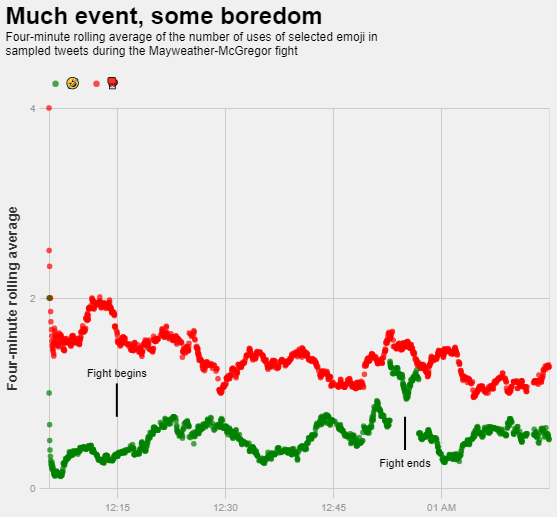

I created a scatter plot to visualize the use of the '🤣' and '🥊'emojis to find any correlation between the two using red and green hue. Scatter plots display a concentration of points over the course of the fight, representing clustered points as an event. The scatter plot used in this way can't easily visualize clusters of related points as well because the scatter points aoverlap in very close proximity, making it difficult to differentiate betwen the points.  A line plot design is better for representing the data as events over a period of time as opposed to using counts.